1. Fairness Models:
a. Demographic Parity:
Explanation: Demographic parity aims to ensure that the distribution of positive outcomes is equal across different demographic groups (e.g., gender, race).
When to Use: This model is suitable when there is a desire for equal representation of positive outcomes among different demographic groups, without considering individual characteristics.
b. Equalized Odds:
Explanation: Equalized odds focuses on ensuring that the true positive rate and false positive rate are equal across different demographic groups.
When to Use: Use this model when you want to ensure that the predictive performance is consistent across different groups, particularly concerning both false positives and false negatives.
c. Individual Fairness:
Explanation: Individual fairness considers the idea that similar individuals should be treated similarly. It assesses the similarity between individuals based on various features.
When to Use: Individual fairness is useful when you want to ensure that the model treats similar individuals similarly, regardless of their demographic group.
2. Data Plot:
Plot the first 10 rows of the dataset along with the column names to visualize the data structure.

In [ ]:
!pip install aif360


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
#3. Read Data and Split

import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv('/content/creditworthiness.csv')

# Define the target variable
target = 'IS_DEFAULT'

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


<Axes: title={'center': 'Late Loan Repayments by Gender'}, xlabel='Gender', ylabel='Count'>

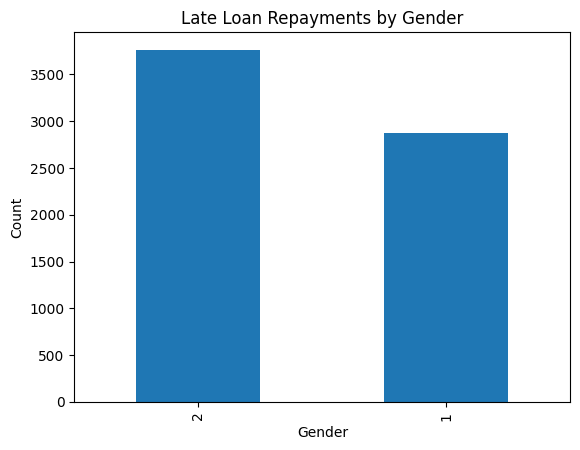

In [ ]:
#late loan repayment by gender
# Count of late repayments by gender
late_repayments = data[data['IS_DEFAULT'] == 1]
gender_counts = late_repayments['GENDER'].value_counts()

# Plot
gender_counts.plot(kind='bar', xlabel='Gender', ylabel='Count', title='Late Loan Repayments by Gender')


6. Define Privileged and Unprivileged Groups:
The privileged and unprivileged groups depend on the context and fairness definition. For example, in gender fairness, one might consider women as the privileged group, or vice versa.

7. Quantify Bias:
There are various metrics to quantify bias according to the lecture notes: -Statistical parity difference (SPD)
-Disparate impact (DI)
-Smoothed empirical differential (SED)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Define the target variable
target = 'IS_DEFAULT'

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the model with custom weights
model_weighted = CatBoostClassifier(class_weights=[0.1, 0.9])

# Train the model
model_weighted.fit(train_data.drop(target, axis=1), train_data[target])

# Predictions
predictions_weighted = model_weighted.predict(test_data.drop(target, axis=1))

# Confusion matrix
conf_matrix_weighted = confusion_matrix(test_data[target], predictions_weighted)
print("Confusion Matrix with Custom Weights:")
print(conf_matrix_weighted)


Learning rate set to 0.040021
0:	learn: 0.6752518	total: 123ms	remaining: 2m 2s
1:	learn: 0.6592297	total: 138ms	remaining: 1m 8s
2:	learn: 0.6437206	total: 177ms	remaining: 58.8s
3:	learn: 0.6303524	total: 219ms	remaining: 54.5s
4:	learn: 0.6177027	total: 257ms	remaining: 51.2s
5:	learn: 0.6076474	total: 279ms	remaining: 46.1s
6:	learn: 0.5984911	total: 320ms	remaining: 45.4s
7:	learn: 0.5894520	total: 357ms	remaining: 44.2s
8:	learn: 0.5814253	total: 404ms	remaining: 44.5s
9:	learn: 0.5738612	total: 433ms	remaining: 42.8s
10:	learn: 0.5672949	total: 474ms	remaining: 42.6s
11:	learn: 0.5609922	total: 505ms	remaining: 41.6s
12:	learn: 0.5547690	total: 539ms	remaining: 40.9s
13:	learn: 0.5489033	total: 580ms	remaining: 40.8s
14:	learn: 0.5440792	total: 625ms	remaining: 41s
15:	learn: 0.5397389	total: 666ms	remaining: 41s
16:	learn: 0.5358014	total: 685ms	remaining: 39.6s
17:	learn: 0.5319955	total: 700ms	remaining: 38.2s
18:	learn: 0.5282892	total: 717ms	remaining: 37s
19:	learn: 0.5251

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Define the target variable
target = 'IS_DEFAULT'

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the model with standard weights
model_standard = CatBoostClassifier()

# Train the model
model_standard.fit(train_data.drop(target, axis=1), train_data[target])

# Predictions
predictions_standard = model_standard.predict(test_data.drop(target, axis=1))

# Confusion matrix
conf_matrix_standard = confusion_matrix(test_data[target], predictions_standard)
print("Confusion Matrix with Standard Weights:")
print(conf_matrix_standard)


Learning rate set to 0.040021
0:	learn: 0.6711557	total: 15.5ms	remaining: 15.5s
1:	learn: 0.6508045	total: 27.3ms	remaining: 13.6s
2:	learn: 0.6326430	total: 39.9ms	remaining: 13.3s
3:	learn: 0.6161661	total: 55.8ms	remaining: 13.9s
4:	learn: 0.6008656	total: 67.5ms	remaining: 13.4s
5:	learn: 0.5869843	total: 79.6ms	remaining: 13.2s
6:	learn: 0.5745513	total: 93.9ms	remaining: 13.3s
7:	learn: 0.5627206	total: 106ms	remaining: 13.1s
8:	learn: 0.5527988	total: 118ms	remaining: 12.9s
9:	learn: 0.5428330	total: 131ms	remaining: 13s
10:	learn: 0.5336659	total: 143ms	remaining: 12.9s
11:	learn: 0.5255884	total: 155ms	remaining: 12.8s
12:	learn: 0.5185245	total: 167ms	remaining: 12.6s
13:	learn: 0.5121364	total: 178ms	remaining: 12.5s
14:	learn: 0.5052921	total: 191ms	remaining: 12.5s
15:	learn: 0.4994125	total: 206ms	remaining: 12.7s
16:	learn: 0.4940758	total: 219ms	remaining: 12.6s
17:	learn: 0.4893950	total: 231ms	remaining: 12.6s
18:	learn: 0.4849910	total: 245ms	remaining: 12.7s
19:	le

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels and predictions for both models
y_true_standard = test_data[target].values
y_pred_standard = predictions_standard

y_true_weighted = test_data[target].values
y_pred_weighted = predictions_weighted

# Define privileged and unprivileged groups based on 'GENDER'
privileged_groups = (test_data['GENDER'] == 1).values  # Assuming 1 represents the privileged group (e.g., men)
unprivileged_groups = (test_data['GENDER'] == 0).values  # Assuming 0 represents the unprivileged group (e.g., women)

# Create confusion matrices
conf_matrix_standard = confusion_matrix(y_true_standard, y_pred_standard)
conf_matrix_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)

# Calculate disparate impact
def calculate_disparate_impact(conf_matrix, privileged_group, unprivileged_group):
    tp_privileged = conf_matrix[1, 1]  # True Positives for privileged group
    tp_unprivileged = conf_matrix[0, 1]  # True Positives for unprivileged group

    disparity = (tp_unprivileged / (tp_unprivileged + 1e-10)) / (tp_privileged / (tp_privileged + 1e-10))
    return disparity

# Calculate mean difference
def calculate_mean_difference(conf_matrix, privileged_group, unprivileged_group):
    tp_privileged = conf_matrix[1, 1]  # True Positives for privileged group
    fp_privileged = conf_matrix[0, 1]  # False Positives for privileged group

    tp_unprivileged = conf_matrix[0, 1]  # True Positives for unprivileged group
    fp_unprivileged = conf_matrix[1, 1]  # False Positives for unprivileged group

    mean_diff = ((tp_unprivileged / (tp_unprivileged + fp_unprivileged + 1e-10)) - (tp_privileged / (tp_privileged + fp_privileged + 1e-10)))
    return mean_diff

# Calculate metrics
disparate_impact_standard = calculate_disparate_impact(conf_matrix_standard, privileged_groups, unprivileged_groups)
mean_difference_standard = calculate_mean_difference(conf_matrix_standard, privileged_groups, unprivileged_groups)

disparate_impact_weighted = calculate_disparate_impact(conf_matrix_weighted, privileged_groups, unprivileged_groups)
mean_difference_weighted = calculate_mean_difference(conf_matrix_weighted, privileged_groups, unprivileged_groups)

# Display fairness metrics
print("Fairness Metrics for Standard Weights:")
print("Disparate Impact:", disparate_impact_standard)
print("Mean Difference:", mean_difference_standard)

print("\nFairness Metrics for Custom Weights:")
print("Disparate Impact:", disparate_impact_weighted)
print("Mean Difference:", mean_difference_weighted)


Fairness Metrics for Standard Weights:
Disparate Impact: 0.9999999999997914
Mean Difference: -0.34143049932519004

Fairness Metrics for Custom Weights:
Disparate Impact: 1.0000000000000493
Mean Difference: 0.3562180066244999


Classification Phases for Bias Reduction:
Preprocessing:

Advantage: Bias reduction starts at the data level. Techniques like re-sampling, re-weighting, and re-labeling can be applied to the training data to balance the representation of different groups, leading to fairer models.
Disadvantage: Preprocessing methods may not fully capture the complex relationships in the data and may oversimplify the problem. Also, they may not address biases that emerge during model training.
In-processing:

Advantage: Bias mitigation is integrated directly into the model training process. This allows the model to adapt and learn fair representations during training.
Disadvantage: Some in-processing methods may require more computational resources. It may also be challenging to find a universally effective algorithm due to variations in dataset characteristics.
Post-processing:

Advantage: Model predictions are adjusted after the model is trained, providing flexibility in applying fairness constraints without modifying the core training algorithm.
Disadvantage: Post-processing methods might be less effective in scenarios where the underlying model has learned biased representations that are difficult to correct after training.
Advantages and Disadvantages of Bias Mitigation Methods:
Preprocessing:
Advantages:
Simplicity: Preprocessing methods are often easy to implement and understand.
Independence: They can be used with any classification algorithm.
Disadvantages:
Lack of Nuance: May oversimplify the problem by addressing bias at the dataset level without considering the complexity of the model.
In-processing:
Advantages:
Integration: Bias mitigation is part of the model training process, allowing the model to adapt and learn fair representations.
Real-time Adjustments: Can make real-time adjustments during training based on evolving data.
Disadvantages:
Algorithm Dependence: Efficacy may depend on the specific algorithm used, and there may not be a one-size-fits-all solution.
Post-processing:
Advantages:
Flexibility: Allows adjustments to be made to model predictions after training.
Applicability: Can be applied to models trained using various algorithms.
Disadvantages:
Limited Correction: May be less effective in cases where the underlying model has learned deeply ingrained biases.
Lack of Adaptability: Cannot influence the core model training process.
Choosing the appropriate method depends on the specific context, data, and desired fairness goals. Often, a combination of these approaches may be used to achieve comprehensive bias mitigation.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Assuming 'data' is your DataFrame and 'target' is your target variable

# Separate features and target
X = data.drop(columns=[target])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights based on the inverse of class frequencies
class_weights = len(y_train) / (2 * np.bincount(y_train))

# Create and fit the classifier with class weights
classifier = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4464  223]
 [ 862  451]]
